## Photosynthetic Activity: Light-Driven Energy Conversion

Photosynthesis is the process by which plants convert light energy into chemical energy. The key steps include:
1. **Light Absorption**: Chlorophyll absorbs photons (primarily in blue & red wavelengths)
2. **Electron Transport**: Energy transfer via photosystems I & II
3. **Calvin Cycle**: CO₂ fixation into sugars using ATP and NADPH

### Mathematical Model of Light-Dependent Reactions
The photosynthetic electron transport rate (ETR) can be modeled as:

$$ \text{ETR} = \phi_\text{PSII} \cdot I \cdot \alpha \cdot (1 - e^{-\frac{I}{I_s}}) $$

Where:
- $I$ = Light intensity (μmol photons/m²/s)
- $\phi_\text{PSII}$ = Quantum yield of PSII
- $\alpha$ = Absorption coefficient
- $I_s$ = Saturation light intensity

#### Key Parameters:
- **Action Spectrum**: Relative efficiency of different wavelengths
- **Light Response Curve**: Photosynthesis vs light intensity
- **Chlorophyll Fluorescence**: Indicator of photosynthetic stress

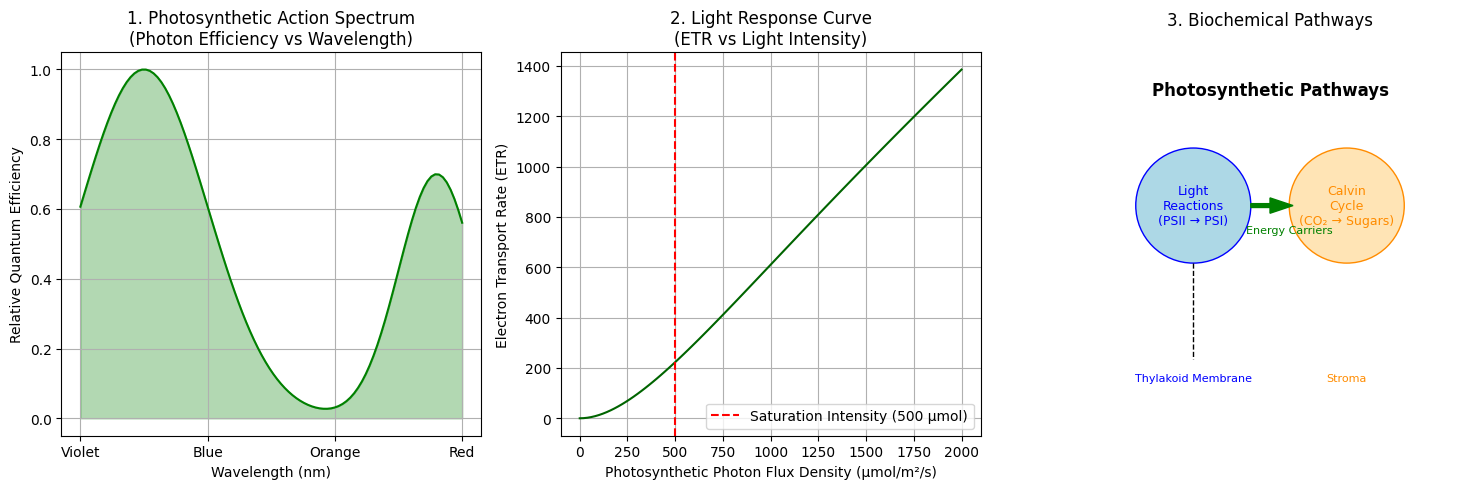

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Photosynthesis Model Parameters
wavelengths = np.linspace(400, 700, 100)  # Visible spectrum (nm)
PAR = np.linspace(0, 2000, 100)           # Photosynthetically Active Radiation (μmol/m²/s)
phi_PSII = 0.83                           # Maximum quantum yield
alpha = 0.85                              # Leaf absorption coefficient
I_s = 500                                 # Saturation intensity (μmol/m²/s)

# Action Spectrum (McCree, 1972)
action_spectrum = np.exp(-0.5*((wavelengths-450)/50)**2) + 0.7*np.exp(-0.5*((wavelengths-680)/30)**2)

# Light Response Curve Model
def electron_transport_rate(I):
    return phi_PSII * I * alpha * (1 - np.exp(-I/I_s))

ETR = electron_transport_rate(PAR)

# Create figure
plt.figure(figsize=(15, 5))

# ----------------------------
# Subplot 1: Action Spectrum
# ----------------------------
plt.subplot(1, 3, 1)
plt.plot(wavelengths, action_spectrum, color='green')
plt.fill_between(wavelengths, action_spectrum, color='green', alpha=0.3)
plt.title('1. Photosynthetic Action Spectrum\n(Photon Efficiency vs Wavelength)')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Relative Quantum Efficiency')
plt.xticks([400, 500, 600, 700], ['Violet', 'Blue', 'Orange', 'Red'])
plt.grid(True)

# ----------------------------
# Subplot 2: Light Response Curve
# ----------------------------
plt.subplot(1, 3, 2)
plt.plot(PAR, ETR, color='darkgreen')
plt.title('2. Light Response Curve\n(ETR vs Light Intensity)')
plt.xlabel('Photosynthetic Photon Flux Density (μmol/m²/s)')
plt.ylabel('Electron Transport Rate (ETR)')
plt.axvline(I_s, color='red', linestyle='--', label=f'Saturation Intensity ({I_s} μmol)')
plt.legend()
plt.grid(True)

# ----------------------------
# Subplot 3: Biochemical Pathways (Grid-Based Layout)
# ----------------------------
plt.subplot(1, 3, 3)

# Create a grid-based diagram using table-like formatting
plt.text(
    0.5,
    0.9,
    "Photosynthetic Pathways",
    ha="center",
    va="center",
    fontsize=12,
    weight="bold",
)

# Create nodes using matplotlib.patches
from matplotlib.patches import Circle, FancyArrow

# Light Reactions Node
plt.gca().add_patch(Circle((0.3, 0.6), 0.15, ec="blue", fc="lightblue"))
plt.text(
    0.3,
    0.6,
    "Light\nReactions\n(PSII → PSI)",
    ha="center",
    va="center",
    color="blue",
    fontsize=9,
)

# Calvin Cycle Node
plt.gca().add_patch(Circle((0.7, 0.6), 0.15, ec="darkorange", fc="moccasin"))
plt.text(
    0.7,
    0.6,
    "Calvin\nCycle\n(CO₂ → Sugars)",
    ha="center",
    va="center",
    color="darkorange",
    fontsize=9,
)

# ATP/NADPH Flow
plt.gca().add_patch(
    FancyArrow(
        0.45, 0.6, 0.05, 0, width=0.01, head_width=0.04, color="green", label="ATP/NADPH"
    )
)
plt.text(
    0.55, 0.55, "Energy Carriers", ha="center", va="top", color="green", fontsize=8
)

# Connection Lines
plt.plot([0.3, 0.3], [0.45, 0.2], "k--", lw=1)  # Vertical dashed line
plt.text(
    0.3, 0.15, "Thylakoid Membrane", ha="center", va="center", color="blue", fontsize=8
)
plt.text(0.7, 0.15, "Stroma", ha="center", va="center", color="darkorange", fontsize=8)

plt.axis("off")
plt.title("3. Biochemical Pathways", y=1.05)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().set_aspect("equal")

# Adjust overall layout
plt.subplots_adjust(wspace=0.3, left=0.05, right=0.95)
plt.tight_layout()
plt.show()